In [2]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 

from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [3]:
# implement RNN from scratch rather than using nn.RNN
class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()       
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)  # 1,57; we needed 57
        
    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)       
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self):
        # initial hidden state at the beginning
        return torch.zeros(1, self.hidden_size)

In [4]:
category_lines, all_categories = load_data() # defined in utils
n_categories = len(all_categories)
n_categories

18

In [5]:
N_LETTERS

57

In [6]:
n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)
rnn

RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [7]:
# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()
hidden_tensor

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [9]:
next_hidden

tensor([[-0.1187, -0.0786,  0.0911,  0.0247,  0.0564,  0.0958,  0.0183,  0.0627,
         -0.0149,  0.1313,  0.0167, -0.0218, -0.0640,  0.0767,  0.0382, -0.0244,
          0.0392,  0.0822,  0.0071,  0.0120, -0.0178,  0.0440,  0.0758,  0.0625,
          0.0037,  0.0287,  0.0545,  0.0618, -0.0248, -0.0147,  0.0522,  0.0475,
         -0.0207, -0.0884, -0.0046, -0.0277,  0.0902, -0.0489, -0.0005,  0.0004,
         -0.0922,  0.0642, -0.0519, -0.0509, -0.0458, -0.0317,  0.0218,  0.0740,
          0.0853,  0.0834,  0.0056,  0.0431, -0.0621,  0.0652, -0.0690,  0.1352,
         -0.0088, -0.0115, -0.0364,  0.0444,  0.0529,  0.1125,  0.0252, -0.0565,
         -0.0003, -0.0696,  0.0196, -0.0670, -0.0244, -0.0158,  0.0151,  0.1134,
          0.0453,  0.0876,  0.0620,  0.0565, -0.0497, -0.1243, -0.0983, -0.0521,
         -0.0793,  0.1115,  0.0500,  0.0493,  0.0086, -0.0427,  0.0894, -0.1090,
          0.0113,  0.0298, -0.0114,  0.0653,  0.0266, -0.1204,  0.0809,  0.0647,
          0.0616, -0.0204, -

In [10]:
# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()
hidden_tensor

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
output, next_hidden = rnn(input_tensor[0], hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [12]:
next_hidden

tensor([[-0.1187, -0.0786,  0.0911,  0.0247,  0.0564,  0.0958,  0.0183,  0.0627,
         -0.0149,  0.1313,  0.0167, -0.0218, -0.0640,  0.0767,  0.0382, -0.0244,
          0.0392,  0.0822,  0.0071,  0.0120, -0.0178,  0.0440,  0.0758,  0.0625,
          0.0037,  0.0287,  0.0545,  0.0618, -0.0248, -0.0147,  0.0522,  0.0475,
         -0.0207, -0.0884, -0.0046, -0.0277,  0.0902, -0.0489, -0.0005,  0.0004,
         -0.0922,  0.0642, -0.0519, -0.0509, -0.0458, -0.0317,  0.0218,  0.0740,
          0.0853,  0.0834,  0.0056,  0.0431, -0.0621,  0.0652, -0.0690,  0.1352,
         -0.0088, -0.0115, -0.0364,  0.0444,  0.0529,  0.1125,  0.0252, -0.0565,
         -0.0003, -0.0696,  0.0196, -0.0670, -0.0244, -0.0158,  0.0151,  0.1134,
          0.0453,  0.0876,  0.0620,  0.0565, -0.0497, -0.1243, -0.0983, -0.0521,
         -0.0793,  0.1115,  0.0500,  0.0493,  0.0086, -0.0427,  0.0894, -0.1090,
          0.0113,  0.0298, -0.0114,  0.0653,  0.0266, -0.1204,  0.0809,  0.0647,
          0.0616, -0.0204, -

In [13]:
# Get category from the rnn's output
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [14]:
print(category_from_output(output))
print(output)

Greek
tensor([[-2.8876, -2.9218, -2.9031, -2.8635, -2.9882, -2.9343, -2.8491, -2.7959,
         -2.8030, -2.8401, -2.8715, -2.9629, -2.8473, -2.9281, -2.9253, -2.9035,
         -2.9698, -2.8577]], grad_fn=<LogSoftmaxBackward0>)


In [15]:
# Not correct category since model is not trained till now
# Next step, training...

In [16]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

In [17]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()                          # initialize hidden state
    
    for i in range(line_tensor.size()[0]):              # length of name
        output, hidden = rnn(line_tensor[i], hidden)    # line_tensor[i]: current character, hidden: previous hidden state
                                                        # We will do this for whole name & then for very last char we get final output
    loss = criterion(output, category_tensor)           # we use above final output to calculate loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

5000 5.0 2.9722 Burns / Greek WRONG (Scottish)
10000 10.0 1.6964 Monti / Italian CORRECT
15000 15.0 2.4641 Maalouf / English WRONG (Arabic)
20000 20.0 1.2707 O'Halloran / Irish CORRECT
25000 25.0 1.2041 Mustafa / Arabic CORRECT
30000 30.0 3.0381 Hunter / German WRONG (Scottish)
35000 35.0 1.4964 Faltysek / Polish WRONG (Czech)
40000 40.0 1.3106 Nascimbene / Italian CORRECT
45000 45.0 1.4340 Hill / Scottish CORRECT
50000 50.0 0.0291 Sokolofsky / Polish CORRECT
55000 55.00000000000001 0.0751 Papoutsis / Greek CORRECT
60000 60.0 0.7385 Ciardha / Irish CORRECT
65000 65.0 0.4194 Himichev / Russian CORRECT
70000 70.0 1.8822 Peerenboom / Czech WRONG (Dutch)
75000 75.0 1.8021 Ruscoe / French WRONG (English)
80000 80.0 0.2828 Mcdonald / Scottish CORRECT
85000 85.0 3.3304 Ludwig / Korean WRONG (German)
90000 90.0 1.2677 Pelaez / Dutch WRONG (Spanish)
95000 95.0 0.5432 Alves / Portuguese CORRECT
100000 100.0 0.1102 Tcharnetsky / Russian CORRECT


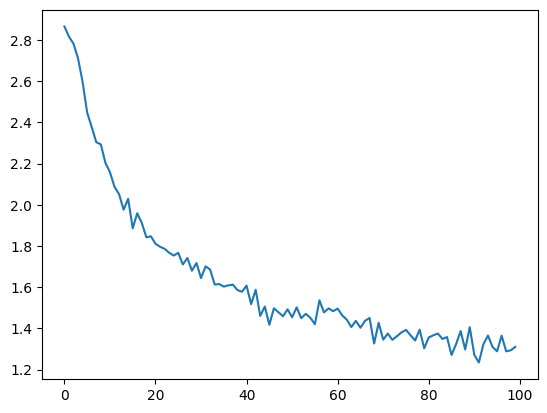

In [18]:
# Training
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor) # train word by word
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")

plt.figure()
plt.plot(all_losses)
plt.show()

In [19]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)

In [20]:
while True:
    sentence = input("Input:")
    if sentence == "quit":
        break
    
    predict(sentence)


> Brian
Scottish

> Cennetig
Scottish

> Colman
Irish

> Bellamy
English

> Bernard
English

> Cloutier
French

> Scott
English

> Fraser
German

> Walker
German

> Muir
Chinese

> Ritchie
Scottish

> Addams
English
